In [1]:
import cox 
from cox.store import Store
from cox.readers import CollectionReader 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch as ch 
from torch import Tensor
from torch.distributions import Uniform
import os 
# set environment variable so that stores can create output files
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

In [26]:
reader = CollectionReader('/home/gridsan/stefanou/Regression/Test')
logs = reader.df('results')
reader.close()
logs.head()

100%|██████████| 10/10 [00:00<00:00, 10.17it/s]


,known_emp_param_mse,known_emp_time,known_param_mse,known_time,unknown_param_mse,unknown_var_mse,unknown_time,ols_param_mse,ols_var_mse,trunc_reg_param_mse,trunc_var_mse,trunc_reg_time,alpha,num_samples,var,exp_id
0,0.069182,3,0.006069,3,0.000635,0.000329,3,0.55945,0.05822,0.000773,0.000352,3,0.4032,4032,1.0,10a9ee3e-531b-492b-9c3d-999d9c149c6f


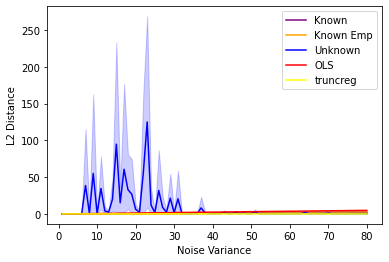

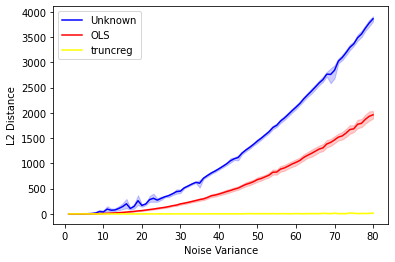

In [25]:
sns.lineplot(data=logs, x='var', y='known_param_mse', label='Known', color="purple")
sns.lineplot(data=logs, x='var', y='known_emp_param_mse', label='Known Emp', color="orange")

sns.lineplot(data=logs, x='var', y='unknown_param_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='var', y='ols_param_mse', label='OLS', color="red")
ax = sns.lineplot(data=logs, x='var', y='trunc_reg_param_mse', label='truncreg', color="yellow")
ax.set(xlabel='Noise Variance', ylabel='L2 Distance')
plt.show()

sns.lineplot(data=logs, x='var', y='unknown_var_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='var', y='ols_var_mse', label='OLS', color="red")
ax = sns.lineplot(data=logs, x='var', y='trunc_var_mse', label='truncreg', color="yellow")
ax.set(xlabel='Noise Variance', ylabel='L2 Distance')
plt.show()

In [6]:
sns.lineplot(data=logs, x='s', y='known_param_mse', label='Known', color="purple")
sns.lineplot(data=logs, x='s', y='known_emp_param_mse', label='Known Emp', color="orange")
sns.lineplot(data=logs, x='s', y='unknown_param_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='s', y='ols_param_mse', label='OLS', color="red")
ax.set(xlabel='Samples In Truncation Set', ylabel='L2 Distance')
plt.show()

# sns.lineplot(data=logs, x='var', y='known_', label='Known', color="purple")
sns.lineplot(data=logs, x='s', y='unknown_var_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='s', y='ols_var_mse', label='OLS', color="red")
ax.set(xlabel='Samples in Truncation Set', ylabel='L2 Distance')
plt.show()

ValueError: Could not interpret value `s` for parameter `x`

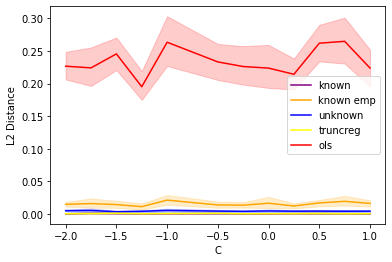

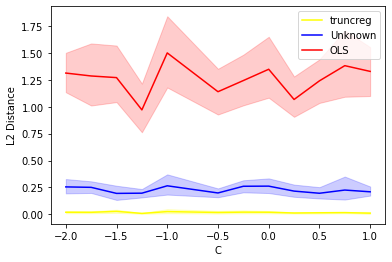

In [31]:
sns.lineplot(data=logs, x='c', y='known_param_mse', label='known', color="purple")
sns.lineplot(data=logs, x='c', y='known_emp_param_mse', label='known emp', color="orange")
sns.lineplot(data=logs, x='c', y='unknown_param_mse', label='unknown', color="blue")
sns.lineplot(data=logs, x='c', y='trunc_reg_param_mse', label='truncreg', color="yellow")
ax = sns.lineplot(data=logs, x='c', y='ols_param_mse', label='ols', color="red")
ax.set(xlabel='C', ylabel='L2 Distance')
plt.show()

sns.lineplot(data=logs, x='c', y='trunc_var_mse', label='truncreg', color="yellow")
sns.lineplot(data=logs, x='c', y='unknown_var_mse', label='Unknown', color="blue")
ax = sns.lineplot(data=logs, x='c', y='ols_var_mse', label='OLS', color="red")
ax.set(xlabel='C', ylabel='L2 Distance')
plt.show()

In [25]:
U = Uniform(-1, 1)
# U_ = Uniform(args.x_lower, args.x_upper)

In [48]:
ch.nn.MSELoss()(Tensor([trunc_df['x'][2]**2]), Tensor([20]))

tensor(0.0218)

In [27]:
ch.manual_seed(1)
# generate ground truth
ground_truth = ch.nn.Linear(in_features=1, out_features=1, bias=True)
ground_truth.weight = ch.nn.Parameter(U.sample(ch.Size([1, 1])))
ground_truth.bias = ch.nn.Parameter(U.sample(ch.Size([1, 1])))

In [32]:
params = ch.cat([ground_truth.weight, ground_truth.bias])
trunc_params = ch.cat([Tensor([trunc_df['x'][1]]), Tensor([trunc_df['x'][0]])])

In [35]:
trunc_params, params

(tensor([-0.1838,  0.3484]),
 tensor([[-0.1939],
         [ 0.4694]], grad_fn=<CatBackward>))

In [57]:
ch.nn.MSELoss()(trunc_params, params.flatten()), ch.nn.MSELoss()(Tensor([trunc_df['x'][2]])**2, Tensor([20]))

(tensor(0.0074, grad_fn=<MseLossBackward>), tensor(0.0218))

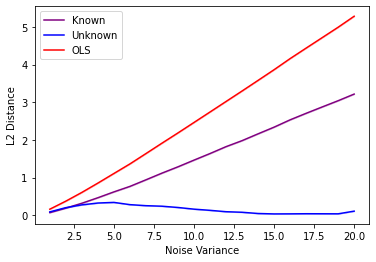

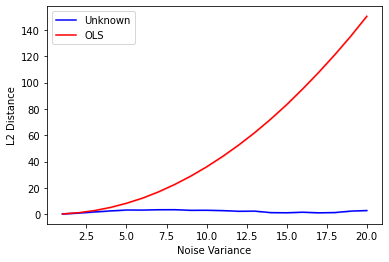

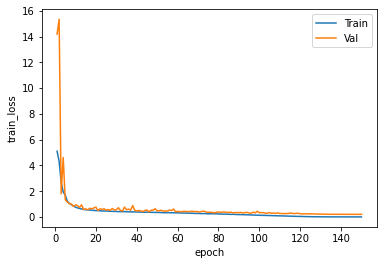

<AxesSubplot:xlabel='epoch', ylabel='train_prec1'>

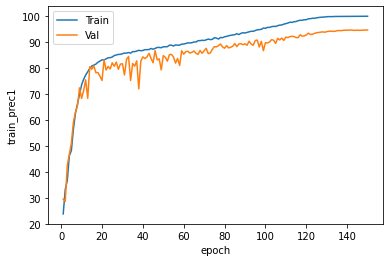

In [41]:
sns.lineplot(data=logs, x='epoch', y='train_loss', label='Train')
sns.lineplot(data=logs, x='epoch', y='val_loss', label='Val')
plt.show()
sns.lineplot(data=logs, x='epoch', y='train_prec1', label='Train')
sns.lineplot(data=logs, x='epoch', y='val_prec1', label='Val')

In [35]:
reader.close()

<AxesSubplot:xlabel='epoch', ylabel='train_prec1'>

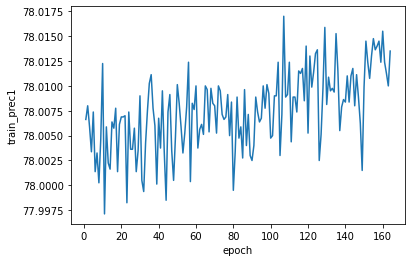

In [20]:
sns.lineplot(data=trunc, x='epoch', y='train_prec1')

In [20]:
import datetime

store = Store('/home/gridsan/stefanou/test')

store.add_table('test', { 
    'time': int
})

st = datetime.datetime.now()
et = datetime.datetime.now()

store['test'].append_row({'time': int((et - st).total_seconds())})

Logging in: /home/gridsan/stefanou/test/75d2b20b-1097-43d6-aeae-fa1afee4d9ce


In [29]:
st = datetime.datetime.now()



-14.063034

In [30]:
et = datetime.datetime.now()

total = (et - st).total_seconds()
total

22.960293

In [31]:
int(total)

22